In [8]:
# =========================
# 1. Mount Google Drive
# =========================
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# =========================
# 2. Import Libraries
# =========================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay


In [10]:
# =========================
# 3. Path Dataset dari Drive (GANTI sesuai Drive kamu!)
# =========================
base_dir = '/content/drive/MyDrive/Types of fish/FishImgDataset'  # Ganti jika lokasi berbeda

train_dir = os.path.join(base_dir, 'train')
val_dir   = os.path.join(base_dir, 'val')
test_dir  = os.path.join(base_dir, 'test')

# Cek isi folder untuk validasi
print("Isi folder utama:", os.listdir(base_dir))
print("Isi TRAIN:", os.listdir(train_dir))
print("Isi VAL:", os.listdir(val_dir))
print("Isi TEST:", os.listdir(test_dir))


Isi folder utama: ['train', 'val', 'test']
Isi TRAIN: ['Silver Perch', 'Scat Fish', 'Tenpounder', 'Pangasius', 'Snakehead', 'Silver Carp', 'Tilapia', 'Silver Barb', 'Perch', 'Indo-Pacific Tarpon', 'Knifefish', 'Mosquito Fish', 'Jaguar Gapote', 'Indian Carp', 'Green Spotted Puffer', 'Long-Snouted Pipefish', 'Mudfish', 'Mullet', 'Janitor Fish', 'Black Spotted Barb', 'Gold Fish', 'Glass Perchlet', 'Freshwater Eel', 'Catfish', 'Grass Carp', 'Goby', 'Fourfinger Threadfin', 'Gourami', 'Climbing Perch', 'Bangus', 'Big Head Carp']
Isi VAL: ['Tilapia', 'Snakehead', 'Tenpounder', 'Silver Carp', 'Pangasius', 'Silver Barb', 'Perch', 'Mullet', 'Silver Perch', 'Scat Fish', 'Long-Snouted Pipefish', 'Indo-Pacific Tarpon', 'Mudfish', 'Knifefish', 'Grass Carp', 'Janitor Fish', 'Indian Carp', 'Jaguar Gapote', 'Green Spotted Puffer', 'Mosquito Fish', 'Gold Fish', 'Black Spotted Barb', 'Gourami', 'Freshwater Eel', 'Fourfinger Threadfin', 'Goby', 'Big Head Carp', 'Glass Perchlet', 'Climbing Perch', 'Catfish

In [11]:
# =========================
# 4. Data Augmentasi & Normalisasi
# =========================
img_height, img_width = 150, 150
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 8801 images belonging to 31 classes.
Found 2751 images belonging to 31 classes.
Found 1760 images belonging to 31 classes.


In [12]:
# =========================
# 5. CNN Model
# =========================
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# =========================
# 6. Kompilasi dan Training
# =========================
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 2531s 9s/step - accuracy: 0.1656 - loss: 3.1816 - val_accuracy: 0.2795 - val_loss: 2.5628
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 610s 2s/step - accuracy: 0.3231 - loss: 2.4028 - val_accuracy: 0.4046 - val_loss: 2.0649
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 601s 2s/step - accuracy: 0.4025 - loss: 2.1254 - val_accuracy: 0.4853 - val_loss: 1.7837
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 564s 2s/step - accuracy: 0.4816 - loss: 1.7919 - val_accuracy: 0.5147 - val_loss: 1.6592
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 572s 2s/step - accuracy: 0.5273 - loss: 1.6261 - val_accuracy: 0.5820 - val_loss: 1.4129
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 594s 2s/step - accuracy: 0.5580 - loss: 1.5099 - val_accuracy: 0.6038 - val_loss: 1.3908
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 566s 2s/step - accuracy: 0.5848 - loss: 1.4209 - val_accuracy: 0.6492 - val_loss: 1.1819
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 568s 2s/step - accuracy: 0.6264 - loss: 1.3000 - val_acc

1760/1760 ━━━━━━━━━━━━━━━━━━━━ 45s 25ms/step
=== Classification Report ===
                       precision    recall  f1-score   support

               Bangus       0.43      0.35      0.39        34
        Big Head Carp       0.82      0.42      0.55        43
   Black Spotted Barb       0.74      0.72      0.73        40
              Catfish       0.72      0.68      0.70        62
       Climbing Perch       0.78      0.23      0.36        30
 Fourfinger Threadfin       0.71      0.58      0.64        38
       Freshwater Eel       0.91      0.53      0.67        55
       Glass Perchlet       0.83      0.81      0.82        77
                 Goby       0.75      0.64      0.69       124
            Gold Fish       0.93      0.98      0.95        41
              Gourami       0.81      0.90      0.86        63
           Grass Carp       0.87      0.93      0.90       238
 Green Spotted Puffer       0.94      0.77      0.85        22
          Indian Carp       0.81      0.89

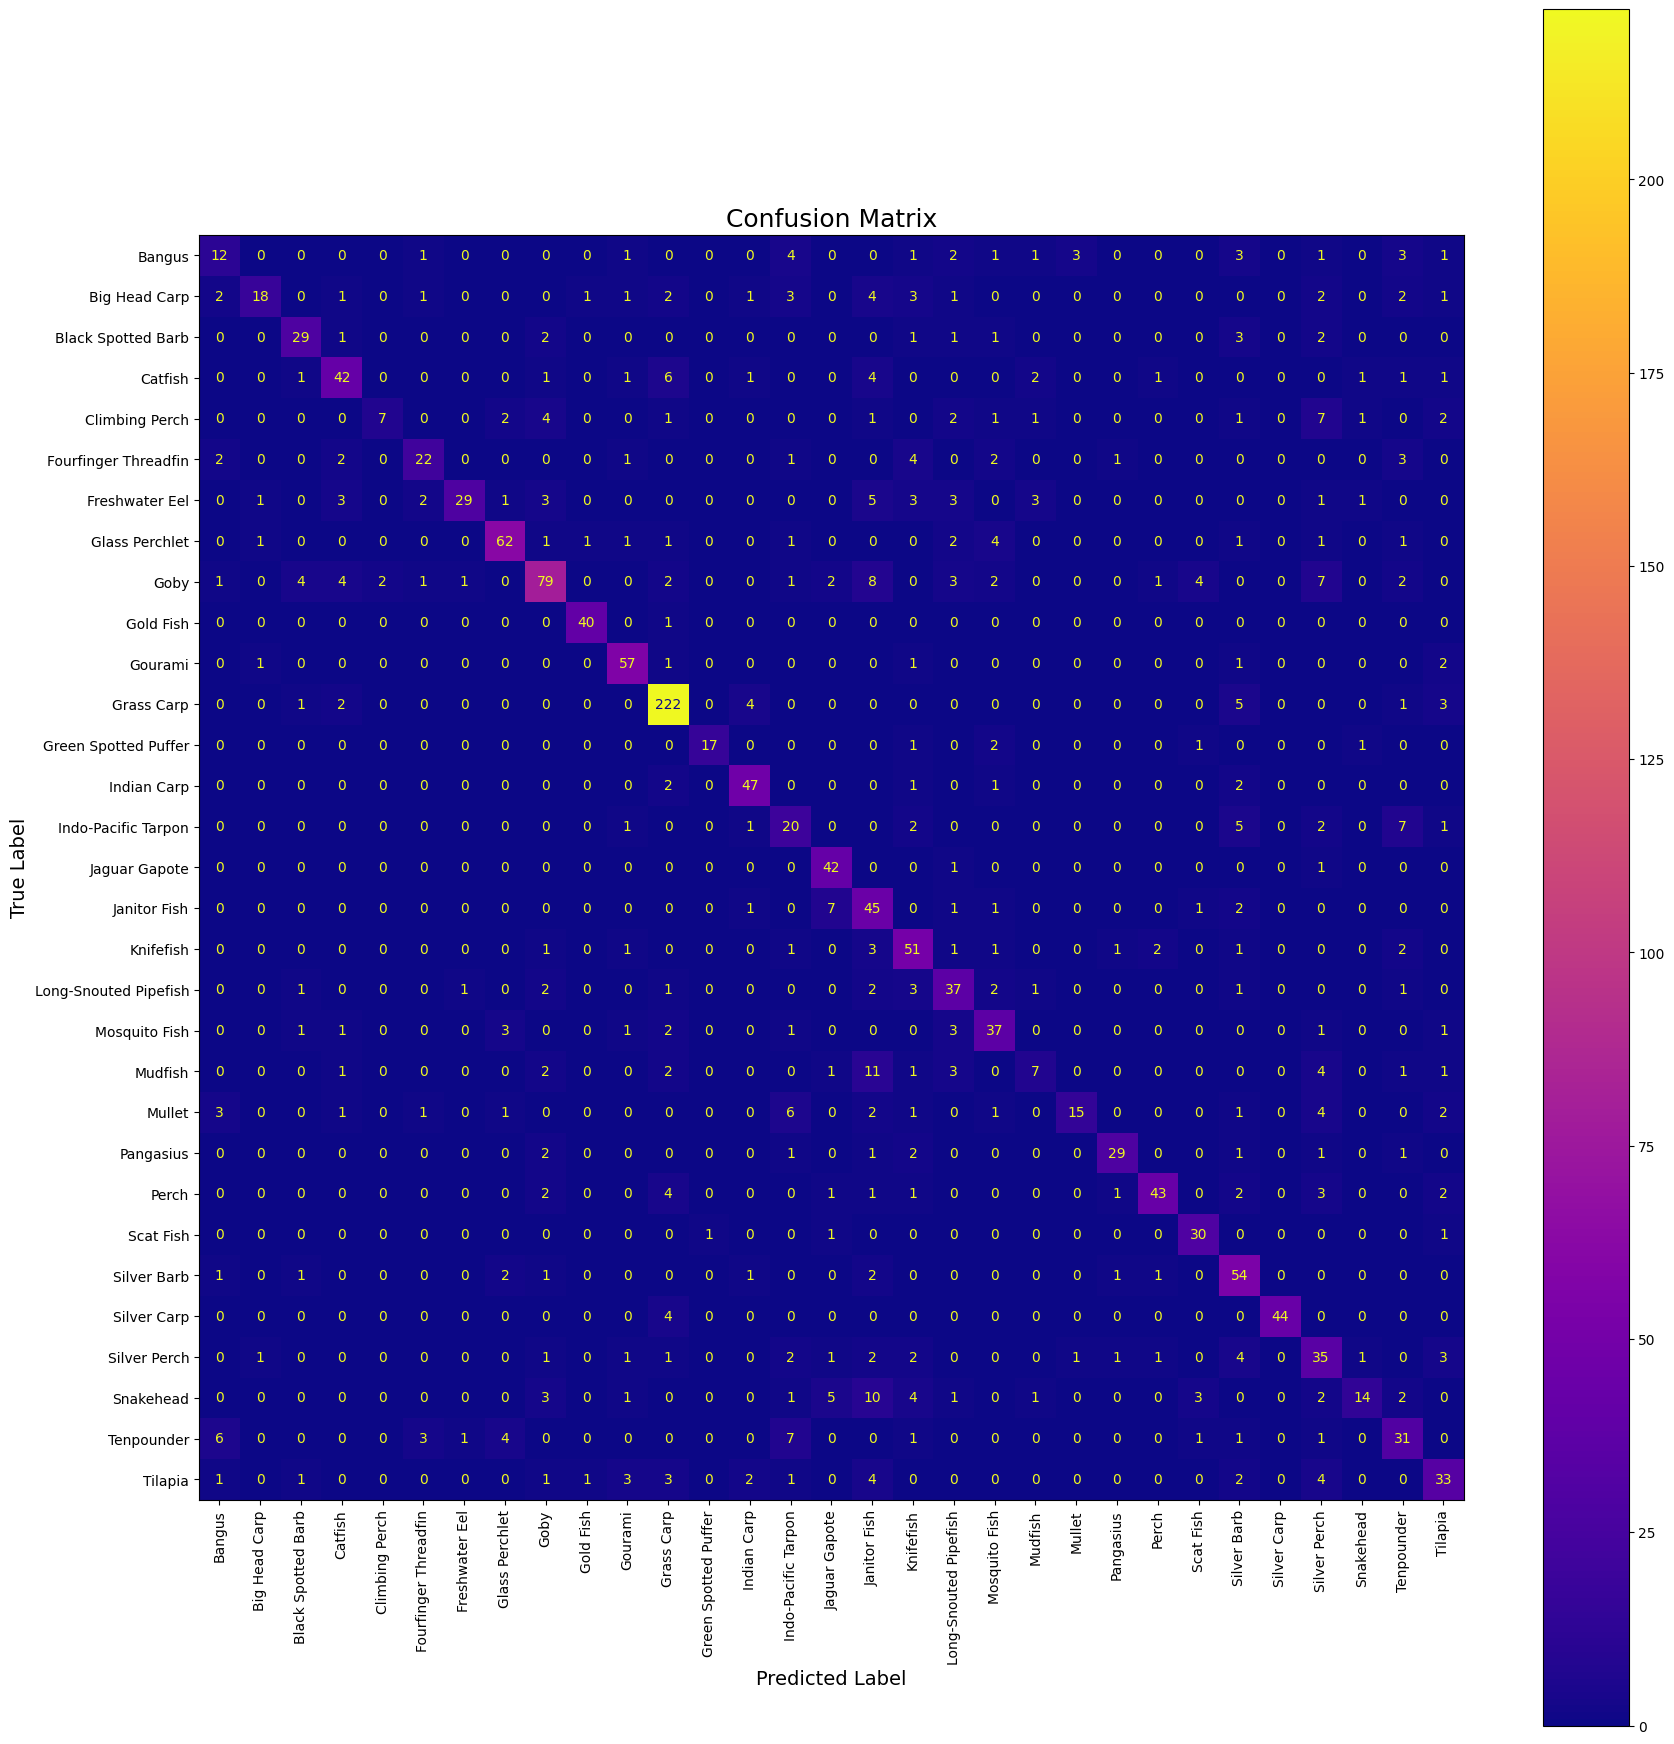

In [16]:
# =========================
# 7. Evaluasi Model
# =========================
# Prediksi label dari data test
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Classification report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix lebih rapi
fig, ax = plt.subplots(figsize=(18, 18))  # ukuran figure besar agar tidak saling tumpang tindih
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

disp.plot(
    ax=ax,
    cmap='plasma',              # colormap yang lebih smooth
    xticks_rotation=90,         # rotasi horizontal agar tidak saling overlap
    colorbar=True,
    values_format='d'           # tampilkan angka sebagai integer
)

# Penyesuaian tambahan untuk estetika
plt.title("Confusion Matrix", fontsize=18)
plt.xlabel("Predicted Label", fontsize=14)
plt.ylabel("True Label", fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()